# 6.2

## Example 6.2

## Example 6.3

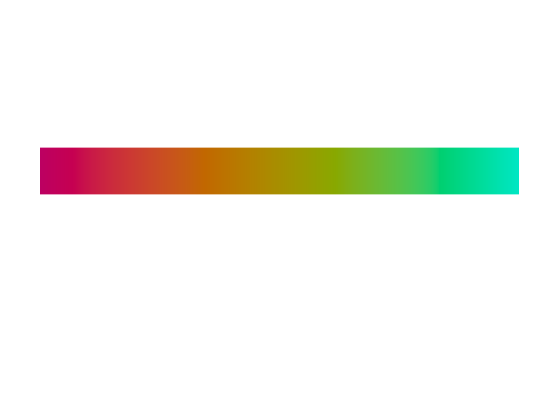

In [2]:
L = linspace(40, 80, 1024);

radius = 70;
theta = linspace(0, pi, 1024);
a = radius * cos(theta);
b = radius * sin(theta);

L = repmat(L, 100, 1);
a = repmat(a, 100, 1);
b = repmat(b, 100, 1);
lab_scale = cat(3, L, a, b);

cform = makecform('lab2srgb');
rgb_scale = applycform(lab_scale, cform);
imshow(rgb_scale)

## Example 6.4

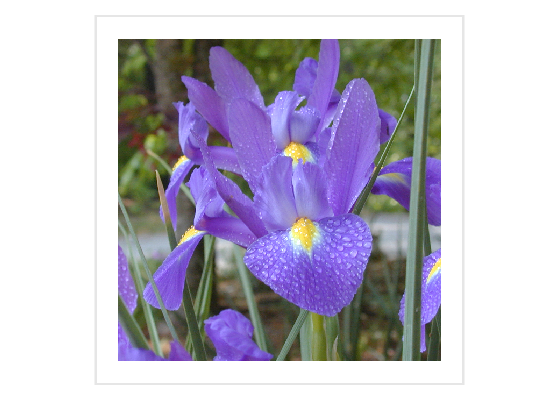

In [3]:
f = imread('Fig0604(a).tif');
fp = padarray(f, [40 40], 255, 'both');
fp = padarray(fp, [4 4], 230, 'both');
imshow(fp)

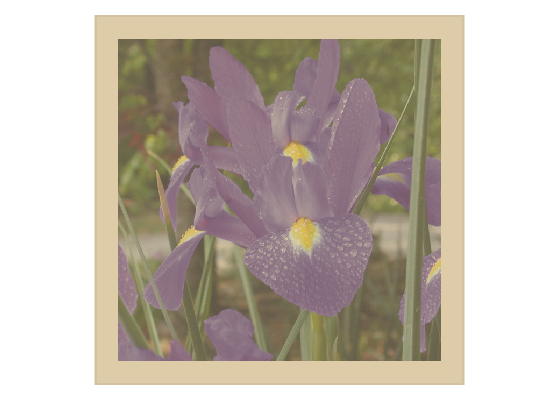

In [5]:
p_srgb = iccread('sRGB.icm');
p_snap = iccread('SNAP2007.icc');

cform1 = makecform('icc', p_srgb, p_snap);
fp_newsprint = applycform(fp, cform1);

cform2 = makecform('icc', p_snap, p_srgb, ...
                    'SourceRenderingIntent', 'AbsoluteColorimetric', ...
                    'DestRenderingIntent', 'AbsoluteColorimetric');
fp_proof = applycform(fp_newsprint, cform2);
imshow(fp_proof)